In [1]:
from gloria.datasets.visualization_utils import *
import pandas as pd
import os
from torch import nn
import seaborn as sns
import cv2
import shutil
from tqdm import tqdm

### Get Results Paths

In [2]:
paths = {
    'uniter_none': '/scratch/mcinerney.de/uniter_data/imagenome/normal_output_test/',
    'uniter_swapleftright': '/scratch/mcinerney.de/uniter_data/imagenome/swapleftright_output_test/',
    'uniter_shufflebboxes': '/scratch/mcinerney.de/uniter_data/imagenome/shufflebboxes_output_test/',
    'uniter_randsent': '/scratch/mcinerney.de/uniter_data/imagenome/randsent_output_test/',
    'uniter_randbboxes': '/scratch/mcinerney.de/uniter_data/imagenome/randbboxes_output_test/',
    'uniter_gensent': '/scratch/mcinerney.de/uniter_data/imagenome/gensent_output_test/',
    'uniter_gensentswapcond': '/scratch/mcinerney.de/uniter_data/imagenome/gensentswapcond_output_test/',

#     'original_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_02_23_23_29/test_outputs_0/',
#     'original_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_07_18_41_32/test_outputs_0/',
#     'original_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_12_05/test_outputs_0/',
#     'original_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_16_30/test_outputs_0/',
#     'original_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_41_11/test_outputs_0/',
#     'original_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_49_57/test_outputs_0/',
#     'original_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_15_07_16/test_outputs_0/',

    'original_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_01_35_54/test_outputs_0/',
    'original_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_02_10_10/test_outputs_0/',
    'original_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_02_41_44/test_outputs_0/',
    'original_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_09_57/test_outputs_0/',
    'original_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_40_21/test_outputs_0/',
    'original_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_04_02_19/test_outputs_0/',
    'original_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_04_22_25/test_outputs_0/',
    
    'retrained_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_11_04_51/test_outputs_0/',
    'retrained_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_11_34_26/test_outputs_0/',
    'retrained_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_12_06_39/test_outputs_0/',
    'retrained_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_12_32_50/test_outputs_0/',
    'retrained_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_13_08_22/test_outputs_0/',
    'retrained_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_13_37_57/test_outputs_0/',
    'retrained_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_14_09_05/test_outputs_0/',

    'retrainedwordmasked_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_11_03_03/test_outputs_0/',
    'retrainedwordmasked_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_12_03_55/test_outputs_0/',
    'retrainedwordmasked_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_13_22_11/test_outputs_0/',
    'retrainedwordmasked_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_14_58_32/test_outputs_0/',
    'retrainedwordmasked_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_16_18_26/test_outputs_0/',
    'retrainedwordmasked_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_45_22/test_outputs_0/',
    'retrainedwordmasked_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_05_00_50/test_outputs_0/',

    'retrainedclinicalmasked_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_48_07/test_outputs_0/',
    'retrainedclinicalmasked_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_07_11/test_outputs_0/',
    'retrainedclinicalmasked_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_45_01/test_outputs_0/',
    'retrainedclinicalmasked_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_04_17_59/test_outputs_0/',
    'retrainedclinicalmasked_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_05_06_41/test_outputs_0/',
    'retrainedclinicalmasked_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_05_49_39/test_outputs_0/',
    'retrainedclinicalmasked_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_06_21_45/test_outputs_0/',

    'retrainednoattn_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_09_10/test_outputs_0/',
    'retrainednoattn_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_38_03/test_outputs_0/',
    'retrainednoattn_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_06_16/test_outputs_0/',
    'retrainednoattn_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_33_38/test_outputs_0/',
    'retrainednoattn_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_11_49/test_outputs_0/',
    'retrainednoattn_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_46_39/test_outputs_0/',
    'retrainednoattn_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_23_14_46/test_outputs_0/',

    'retrainedabnormal_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_19_56_20/test_outputs_0/',
    'retrainedabnormal_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_09_24/test_outputs_0/',
    'retrainedabnormal_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_15_17/test_outputs_0/',
    'retrainedabnormal_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_23_16_57/test_outputs_0/',
    'retrainedabnormal_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_18_00_43_51/test_outputs_0/',
    'retrainedabnormal_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_18_01_26_48/test_outputs_0/',
    'retrainedabnormal_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_18_02_41_39/test_outputs_0/',

    'retrainedsup_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_13_25/test_outputs_0/',
    'retrainedsup_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_54_29/test_outputs_0/',
    'retrainedsup_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_26_04/test_outputs_0/',
    'retrainedsup_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_53_29/test_outputs_0/',
    'retrainedsup_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_21_36/test_outputs_0/',
    'retrainedsup_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_50_23/test_outputs_0/',
    'retrainedsup_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_23_18_51/test_outputs_0/',

    'retrainedrandsent_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_02_23_27_17/test_outputs_0/',
    'retrainedrandsent_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_08_10_43_08/test_outputs_0/',
    'retrainedrandsent_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_22_14/test_outputs_0/',
    'retrainedrandsent_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_45_27/test_outputs_0/',
    'retrainedrandsent_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_44_43/test_outputs_0/',
    'retrainedrandsent_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_58_31/test_outputs_0/',
    'retrainedrandsent_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_15_12_23/test_outputs_0/',
}


In [3]:
dfs = {k: pd.read_csv(os.path.join(path, 'sentences.csv')) for k, path in paths.items()}

### Postprocess Dataframes

#### Get mean report bboxes iou for creating most diverse report bboxes subset

In [4]:
def get_mean_report_ious(df):
    mean_ious = []
    image_shape = (224, 224)
    report_to_mean_iou = {}
    for i, row in tqdm(df.iterrows(), total=len(df)):
        if row.dicom_id in report_to_mean_iou.keys():
            mean_report_iou = report_to_mean_iou[row.dicom_id]
        else:
            report_rows = df[df.dicom_id == row.dicom_id]
            if len(report_rows) > 1:
                report_ious = []
                for a in range(len(report_rows) - 1):
                    row1 = report_rows.iloc[a]
                    label1 = sent_bboxes_to_segmentation_label(image_shape, eval(row1.bboxes))
                    for b in range(a + 1, len(report_rows)):
                        row2 = report_rows.iloc[b]
                        label2 = sent_bboxes_to_segmentation_label(image_shape, eval(row2.bboxes))
                        iou = ((label1 == 1) & (label2 == 1)).float().sum() / \
                              ((label1 == 1) | (label2 == 1)).float().sum()
                        report_ious.append(iou)
                mean_report_iou = sum(report_ious) / len(report_ious)
            else:
                mean_report_iou = None
            report_to_mean_iou[row.dicom_id] = mean_report_iou
        mean_ious.append(mean_report_iou)
    return mean_ious
dfs['original_none']['mean_report_ious'] = get_mean_report_ious(dfs['original_none'])

100%|██████████| 2496/2496 [00:06<00:00, 363.62it/s]


In [5]:
new_df = dfs['original_none'][~dfs['original_none'].auroc.isna() & ~dfs['original_none'].mean_report_ious.isna()]
threshold = new_df.sort_values('mean_report_ious')[:int(len(new_df) * .1)].mean_report_ious.max()
new_df = new_df[new_df.mean_report_ious <= threshold]
dicom_sent_id_set = set(new_df.dicom_sent_id.tolist())
most_diverse_report_bboxes_selector = lambda row: row.dicom_sent_id in dicom_sent_id_set

#### Get kl divergence with random sentence

In [6]:
def get_kl_divergence_with_random_sentence(df, path, path_random):
    kls = []
    for i, row in tqdm(df.iterrows(), total=len(df)):
        attn = torch.tensor(np.load(os.path.join(path, 'attn', row.dicom_sent_id + '.npy')))
        attn_random = torch.tensor(np.load(os.path.join(path_random, 'attn', row.dicom_sent_id + '.npy')))
        kl = ((attn_random * (torch.log(attn_random) - torch.log(attn))).sum() +
              (attn * (torch.log(attn) - torch.log(attn_random))).sum()) / 2
        kls.append(kl.item())
    return kls
for k in ['uniter', 'original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked',
          'retrainednoattn', 'retrainedabnormal', 'retrainedsup', 'retrainedrandsent']:
    dfs['%s_none' % k]['attn_kl_with_randsent'] = get_kl_divergence_with_random_sentence(
        dfs['%s_none' % k], paths['%s_none' % k], paths['%s_randsent' % k])


100%|██████████| 2496/2496 [00:07<00:00, 353.51it/s]


#### Add isabnormal

In [7]:
def get_isabnormal(df):
    abnormal_selector = RowLabelAndContextSelector(contains={('abnormal', 'yes')})
    return df.progress_apply(abnormal_selector, axis=1)


for k in ['uniter', 'original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked',
          'retrainednoattn', 'retrainedabnormal', 'retrainedsup', 'retrainedrandsent']:
    dfs['%s_none' % k]['isabnormal'] = get_isabnormal(dfs['%s_none' % k])

100%|██████████| 2496/2496 [00:00<00:00, 15232.88it/s]


### Plot Histograms

### Get Localization Scores

In [8]:
one_lung_selector = OrSelector(
             RowBBoxSelector(contains={'left lung'}, does_not_contain={'right lung'}),
             RowBBoxSelector(contains={'right lung'}, does_not_contain={'left lung'})
         )
abnormal_selector = RowLabelAndContextSelector(contains={('abnormal', 'yes')})
selectors = {'all': None, 'abnormal': abnormal_selector, 'one_lung': one_lung_selector,
             'most_diverse_report_bboxes': most_diverse_report_bboxes_selector
            }
example_df = dfs['original_none']
selector_counts = {name: len(example_df[example_df.apply(selector, axis=1)])
                   if selector is not None else len(example_df)
                   for name, selector in selectors.items()}
score_rows = []
ps = [.05, .1, .2, .3]
for k, df in dfs.items():
    score_rows.append({'model': k})
    for name, selector in selectors.items():
        rows = df[df.apply(selector, axis=1)] if selector is not None else df
        score_rows[-1]['%s_auroc' % name] = rows.auroc.mean()
        score_rows[-1]['%s_avg_precision' % name] = rows.avg_precision.mean()
        if 'attn_kl_with_randsent' in rows.keys():
            score_rows[-1]['%s_attn_kl_with_randsent' % name] = rows.attn_kl_with_randsent.mean()
        for p in ps:
            score_rows[-1]['%s_precision_at_%f' % (name, p)] = rows['precision_at_%f' % p].mean() \
                if 'precision_at_%f' % p in rows.keys() else None
            score_rows[-1]['%s_recall_at_%f' % (name, p)] = rows['recall_at_%f' % p].mean() \
                if 'recall_at_%f' % p in rows.keys() else None
            score_rows[-1]['%s_f1_at_%f' % (name, p)] = rows['f1_at_%f' % p].mean() \
                if 'f1_at_%f' % p in rows.keys() else None
            score_rows[-1]['%s_iou_at_%f' % (name, p)] = rows['iou_at_%f' % p].mean() \
                if 'iou_at_%f' % p in rows.keys() else None
    #     info = path_and_rows_to_info(path, rows=rows)
    #     plot_info(get_attn_overlay, info, path=path)
#     plt.close()
scores_df = pd.DataFrame(score_rows)
new_rows = []
for i, row in scores_df.iterrows():
    if row['model'].split('_')[1].startswith('gensent'):
        base_model = row['model'].split('_')[0] + '_gensent'
    else:
        base_model = row['model'].split('_')[0] + '_none'
    base_model_row = scores_df[scores_df.model == base_model].iloc[0]
    for name, selector in selectors.items():
        for k in (
                ['avg_precision', 'auroc'] +
                ['precision_at_%f' % p for p in ps] +
                ['iou_at_%f' % p for p in ps]):
            row['%s_%s_delta' % (name, k)] = row['%s_%s' % (name, k)] - base_model_row['%s_%s' % (name, k)]
    new_rows.append(row)
scores_df = pd.DataFrame(new_rows)
print('val counts', selector_counts)
scores_df

val counts {'all': 2496, 'abnormal': 748, 'one_lung': 285, 'most_diverse_report_bboxes': 252}


,model,all_auroc,all_avg_precision,all_attn_kl_with_randsent,all_precision_at_0.050000,all_recall_at_0.050000,all_f1_at_0.050000,all_iou_at_0.050000,all_precision_at_0.100000,all_recall_at_0.100000,...,most_diverse_report_bboxes_avg_precision_delta,most_diverse_report_bboxes_auroc_delta,most_diverse_report_bboxes_precision_at_0.050000_delta,most_diverse_report_bboxes_precision_at_0.100000_delta,most_diverse_report_bboxes_precision_at_0.200000_delta,most_diverse_report_bboxes_precision_at_0.300000_delta,most_diverse_report_bboxes_iou_at_0.050000_delta,most_diverse_report_bboxes_iou_at_0.100000_delta,most_diverse_report_bboxes_iou_at_0.200000_delta,most_diverse_report_bboxes_iou_at_0.300000_delta
0,uniter_none,0.849221,0.685733,0.037789,0.630800,0.271269,0.324656,0.025707,0.666557,0.409839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,uniter_swapleftright,0.848435,0.686307,NaN,0.630292,0.275627,0.330181,0.025821,0.665622,0.408569,...,-0.001235,-0.003361,-0.018254,-0.022989,-0.008245,-0.007000,0.009177,-0.003980,0.005889,-0.006809
2,uniter_shufflebboxes,0.847025,0.679245,NaN,0.619747,0.268198,0.320914,0.026567,0.656247,0.403274,...,0.022391,0.006215,-0.008549,-0.010858,0.027929,0.031676,0.018331,-0.003433,0.007741,0.001002
3,uniter_randsent,0.845240,0.676891,NaN,0.613587,0.258786,0.312889,0.024851,0.653489,0.392285,...,-0.012952,-0.007405,-0.031729,-0.037467,-0.003838,-0.001820,0.002962,-0.005318,-0.012469,-0.004803
4,uniter_randbboxes,0.701941,0.492305,NaN,0.431189,0.202631,0.232485,0.013836,0.475180,0.311434,...,-0.085008,-0.122160,-0.102575,-0.074839,-0.021063,0.008082,-0.016025,-0.052656,-0.072909,-0.071775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,retrainedrandsent_shufflebboxes,0.391982,0.307614,NaN,0.153366,0.330090,0.167743,0.003645,0.155219,0.336153,...,0.001751,-0.002485,-0.001496,-0.003797,-0.002954,0.000762,0.000079,-0.000786,-0.001272,-0.000233
59,retrainedrandsent_randsent,0.389982,0.306510,NaN,0.146467,0.314292,0.159300,0.003348,0.150156,0.319982,...,0.002022,0.004225,0.004473,0.000904,0.002665,0.003878,0.000171,-0.000723,0.000516,0.001988
60,retrainedrandsent_randbboxes,0.419162,0.303315,NaN,0.159990,0.329713,0.163861,0.005057,0.159007,0.336698,...,0.080303,0.016584,0.071391,0.060033,0.062265,0.078936,0.004135,0.005258,0.009960,0.022777
61,retrainedrandsent_gensent,0.360932,0.291510,NaN,0.086785,0.106949,0.059782,0.004525,0.089427,0.114282,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Get Latex tables for Localization Scores

In [18]:
def get_latex_table_localization_scores(prefixes, scores_df, deltas=True, metrics=['auroc', 'avg_precision', 'precision', 'iou'], replace_synthetic=True, models=None, modelnames=True):
    latex_table = ''
    model_names = {'original': 'GLoRIA', 'retrained': 'GLoRIA Retrained',
                   'retrainedwordmasked': '+Word Masking',
                   'retrainedclinicalmasked': '+Clinical Masking',
                   'retrainednoattn': '+"No Attn" Token',
                   'retrainedabnormal': '+Abnormal',
                   'retrainedsup': '+30-shot Finetuned',
                   'retrainedrandsent': '+Rand Sents',
                   'uniter': 'UNITER'}
    augmentation_names = {'none': 'Base', 'randsent': 'Random Sentences',
                          'shufflebboxes': 'Shuffle Bboxes', 'randbboxes': 'Random Bboxes',
                          'swapleftright': 'Swap Left Right',
                          'gensent': 'Synthetic Sentences',
                          'gensentswapcond': 'Synth w/ Swapped Conditions'}
    for i, row in scores_df.iterrows():
        formatted_row_scores = []
        augmentation = augmentation_names[row.model.split('_')[-1]]
        if models is not None and row.model.split('_')[0] not in models:
            continue
        if not deltas and not (augmentation == 'Base' or augmentation == 'Synthetic Sentences'):
            continue
        for name in prefixes:
            if augmentation == 'Base' or augmentation == 'Synthetic Sentences':
                if 'auroc' in metrics:
                    formatted_row_scores.append(row['%s_auroc' % name])
                if 'avg_precision' in metrics:
                    formatted_row_scores.append(row['%s_avg_precision' % name])
                if 'precision' in metrics:
                    formatted_row_scores.append(
                        '%.2f/%.2f/%.2f' % tuple(row['%s_precision_at_%f' % (name, p)] * 100 for p in [.05, .1, .3]))
                if 'iou' in metrics:
                    formatted_row_scores.append(
                        '%.2f/%.2f/%.2f' % tuple(row['%s_iou_at_%f' % (name, p)] * 100 for p in [.05, .1, .3]))
            else:
                if 'auroc' in metrics:
                    formatted_row_scores.append(
                        ('+' if row['%s_auroc_delta' % name] > 0 else '-') +
                        '%.2f' % abs(row['%s_auroc_delta' % name] * 100))
                if 'avg_precision' in metrics:
                    formatted_row_scores.append(
                        ('+' if row['%s_avg_precision_delta' % name] > 0 else '-') +
                        '%.2f' % abs(row['%s_avg_precision_delta' % name] * 100))
                if 'precision' in metrics:
                    formatted_row_scores.append(
                        '%s/%s/%s' %
                        tuple(
                            ('+' if row['%s_precision_at_%f_delta' % (name, p)] > 0 else '-') +
                            ('%.2f' % abs(row['%s_precision_at_%f_delta' % (name, p)] * 100))
                            for p in [.05, .1, .3])
                    )
                if 'iou' in metrics:
                    formatted_row_scores.append(
                        '%s/%s/%s' %
                        tuple(
                            ('+' if row['%s_iou_at_%f_delta' % (name, p)] > 0 else '-') +
                            ('%.2f' % abs(row['%s_iou_at_%f_delta' % (name, p)] * 100))
                            for p in [.05, .1, .3])
                    )
        if augmentation == 'Synthetic Sentences':
#             latex_table += '\cline{2-6}\n'
            pass
        if augmentation == 'Base':
            latex_table += '\hline\n'
            model = model_names['_'.join(row.model.split('_')[:-1])]
            model = '\multirow{' + ('7' if deltas else '2') + '}{*}{' + model + '}'
        else:
            model = ''
        if modelnames:
            formatted_row_scores = '%s & %s & ' % (model, augmentation) + ' & '.join(
                ['%.2f' % (s * 100) if isinstance(s, float) else str(s) for s in formatted_row_scores])
        else:
            formatted_row_scores = '%s & ' % augmentation + ' & '.join(
                ['%.2f' % (s * 100) if isinstance(s, float) else str(s) for s in formatted_row_scores])
            
        latex_table += formatted_row_scores + ' \\\\'
        latex_table += '\n'
    if replace_synthetic:
        latex_table = latex_table.replace('Base ', '\\xmark ')
        latex_table = latex_table.replace('Synthetic Sentences ', '\\greencheck ')
    print(latex_table)

    
print('gloria all')
get_latex_table_localization_scores(['all'], scores_df, deltas=False, metrics=['auroc', 'avg_precision', 'iou'], models=['original'], modelnames=False)
print('gloria abnormal, one lung, mdrb')
get_latex_table_localization_scores(['abnormal'], scores_df, deltas=False, metrics=['auroc', 'avg_precision', 'iou'], models=['original'])
get_latex_table_localization_scores(['one_lung'], scores_df, deltas=False, metrics=['auroc', 'avg_precision', 'iou'], models=['original'])
get_latex_table_localization_scores(['most_diverse_report_bboxes'], scores_df, deltas=False, metrics=['auroc', 'avg_precision', 'iou'], models=['original'])
print('retrained all')
retrained = [
    'retrained',
    'retrainedwordmasked',
    'retrainedclinicalmasked',
    'retrainednoattn',
    'retrainedabnormal',
    'retrainedsup',
    'retrainedrandsent',
    'uniter']
get_latex_table_localization_scores(['all'], scores_df, deltas=False, metrics=['auroc', 'avg_precision'], models=retrained)
print('retrained all, abnormal, one lung, mdrb')
get_latex_table_localization_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'], scores_df, deltas=False, metrics=['auroc', 'avg_precision'])
print('all models precision, all, abnormal, one lung, mdrb')
get_latex_table_localization_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'], scores_df, deltas=False, metrics=['precision'])
print('all models iou, all, abnormal, one lung, mdrb')
get_latex_table_localization_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'], scores_df, deltas=False, metrics=['iou'])


gloria all
\hline
\xmark & 69.07 & 51.68 & 3.79/6.69/20.10 \\
\greencheck & 69.28 & 52.17 & 4.89/8.96/23.62 \\

gloria abnormal, one lung, mdrb
\hline
\multirow{2}{*}{GLoRIA} & \xmark & 69.51 & 48.29 & 4.10/7.25/19.05 \\
 & \greencheck & 70.30 & 49.93 & 7.20/13.25/29.30 \\

\hline
\multirow{2}{*}{GLoRIA} & \xmark & 65.48 & 38.68 & 4.43/8.05/20.54 \\
 & \greencheck & 66.62 & 41.29 & 7.55/12.82/27.69 \\

\hline
\multirow{2}{*}{GLoRIA} & \xmark & 65.01 & 36.96 & 3.56/6.37/16.92 \\
 & \greencheck & 66.24 & 37.95 & 4.83/8.24/19.84 \\

retrained all
\hline
\multirow{2}{*}{UNITER} & \xmark & 84.92 & 68.57 \\
 & \greencheck & 84.87 & 68.80 \\
\hline
\multirow{2}{*}{GLoRIA Retrained} & \xmark & 55.84 & 41.22 \\
 & \greencheck & 54.98 & 41.05 \\
\hline
\multirow{2}{*}{+Word Masking} & \xmark & 61.44 & 44.69 \\
 & \greencheck & 59.28 & 43.36 \\
\hline
\multirow{2}{*}{+Clinical Masking} & \xmark & 54.67 & 40.61 \\
 & \greencheck & 54.57 & 40.60 \\
\hline
\multirow{2}{*}{+"No Attn" Token} & \xmark 

### Entropy

In [10]:
model_names = {'original': 'GLoRIA', 'retrained': 'GLoRIA Retrained',
                   'retrainedwordmasked': '+Word Masking',
                   'retrainedclinicalmasked': '+Clinical Masking',
                   'retrainednoattn': '+"No Attn" Token',
                   'retrainedabnormal': '+Abnormal',
                   'retrainedsup': '+30-shot Finetuned',
                   'retrainedrandsent': '+Rand Sents',
                   'uniter': 'UNITER'}
models = ['uniter_none', 'original_none', 'retrained_none', 'retrainedwordmasked_none',
          'retrainedclinicalmasked_none',
          'retrainednoattn_none',
          'retrainedabnormal_none', 'retrainedsup_none',
          'retrainedrandsent_none']
subset_names = {
    'all': 'All',
    'abnormal': 'Abnormal',
    'one_lung': 'One Lung',
    'most_diverse_report_bboxes': 'Most Diverse Report BBoxes'
}
ks = list(selectors.keys())
latex_entropy_table = 'Model & ' + ' & '.join([subset_names[k] for k in ks]) + '\\\\\n'
latex_entropy_table += '\hline\n'
for model in models:
    entropies = []
    for k in ks:
        selector = selectors[k]
        df = dfs[model]
        if selector is not None:
            df = df[df.apply(selector, axis=1)]
        entropies.append(df.attn_entropy.mean())
    latex_entropy_table += model_names[model.split('_')[0]] + ' & ' + ' & '.join(['%.3f' % e for e in entropies]) + '\\\\\n'
print(latex_entropy_table)


Model & All & Abnormal & One Lung & Most Diverse Report BBoxes\\
\hline
UNITER & 1.777 & 1.668 & 1.644 & 1.721\\
GLoRIA & 5.828 & 5.841 & 5.833 & 5.822\\
GLoRIA Retrained & 5.857 & 5.863 & 5.872 & 5.862\\
+Word Masking & 5.841 & 5.848 & 5.858 & 5.846\\
+Clinical Masking & 5.864 & 5.866 & 5.876 & 5.868\\
+"No Attn" Token & 5.849 & 5.855 & 5.861 & 5.856\\
+Abnormal & 5.803 & 5.816 & 5.825 & 5.806\\
+30-shot Finetuned & 5.677 & 5.729 & 5.748 & 5.692\\
+Rand Sents & 5.889 & 5.889 & 5.889 & 5.889\\



### Plot Deltas

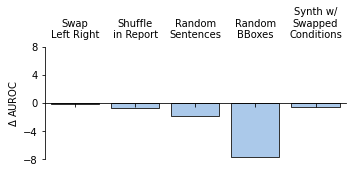

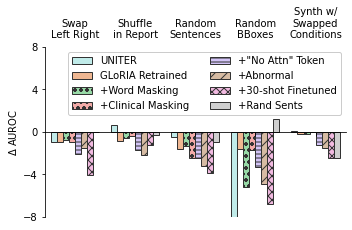

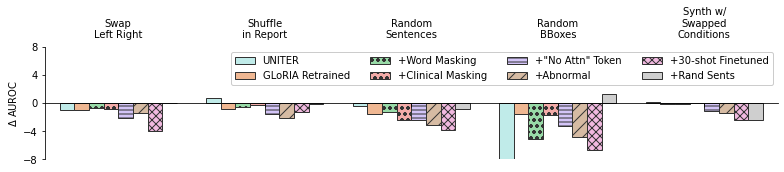

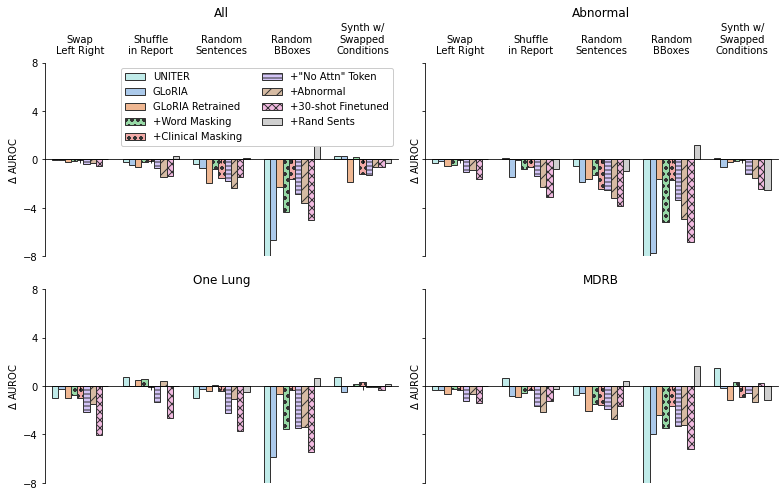

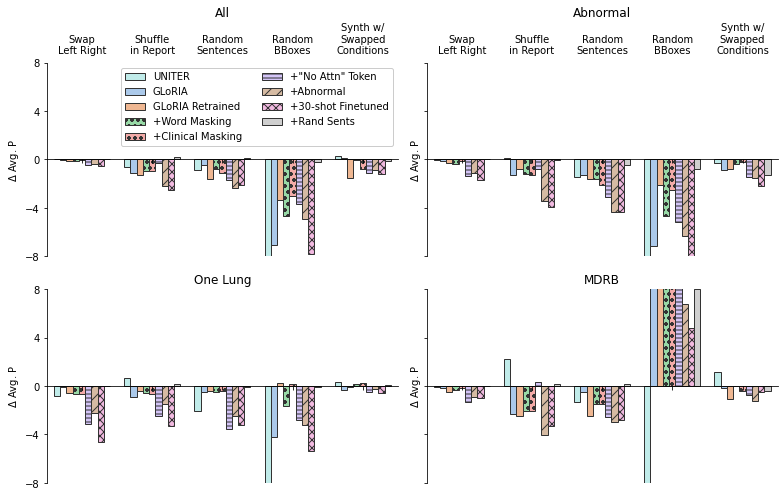

In [16]:
from matplotlib import rc
rc('text', usetex=False)
def get_delta_plots(scores_df, perturbations, subsets, models, shape=(1, 1), indices=(0), size=4,
                    figsize=None, bbox_to_anchor=None, metric='auroc', nlegendcols=3, palette='pastel',
                    hatches=None):
    model_names = {'original': 'GLoRIA', 'retrained': 'GLoRIA Retrained',
                   'retrainedwordmasked': '+Word Masking',
                   'retrainedclinicalmasked': '+Clinical Masking',
                   'retrainednoattn': '+"No Attn" Token',
                   'retrainedabnormal': '+Abnormal',
                   'retrainedsup': '+30-shot Finetuned',
                   'retrainedrandsent': '+Rand Sents',
                   'uniter': 'UNITER'}
    perturbation_names = {'randsent': 'Random\nSentences',
                          'shufflebboxes': 'Shuffle\nin Report', 'randbboxes': 'Random\nBBoxes',
                          'swapleftright': 'Swap\nLeft Right',
                          'gensentswapcond': 'Synth w/\nSwapped\nConditions'}
    subset_names = {
        'all': 'All',
        'abnormal': 'Abnormal',
        'one_lung': 'One Lung',
        'most_diverse_report_bboxes': 'MDRB'
    }
    metric_names = {
        'auroc': 'AUROC',
        'avg_precision': 'Avg. P',
    }
    bar_width = 1 / (len(models) + 1)
#     tic_positions = [i + (bar_width * (len(models) - 1) / 2) for i in range(len(perturbations))]
    tic_positions = [i - bar_width for i in range(len(perturbations))]
    figsize = (size * len(subsets) * 1.05, size) if figsize is None else figsize
    fig, axs = plt.subplots(shape[0], shape[1], figsize=figsize, sharey=True, tight_layout=True, sharex=True)
    if not isinstance(axs, np.ndarray):
        axs = np.array([[axs]])
        remove_x_axis = [True for x in indices]
    if shape[0] > 1 and shape[1] > 1:
#         remove_y_axis = [x > 0 for y, x in indices]
        remove_x_axis = [y < shape[0] - 1 for y, x in indices]
    elif shape[0] > 1:
#         remove_y_axis = [False for y in indices]
        remove_x_axis = [y < shape[0] - 1 for y in indices]
    elif shape[1] > 1:
#         remove_y_axis = [x > 0 for x in indices]
        remove_x_axis = [False for x in indices]
    remove_y_axis = [False] * len(indices)
    if 'condensed' in subsets:
        assert len(subsets) == 1
    for a, subset in enumerate(subsets):
#         for b, model in enumerate(models):
#             positions = [i - .5 + (b * bar_width) for i in range(len(perturbations))]
#             ys = []
#             for p in perturbations:
#                 rows = scores_df[scores_df.model == (model + '_' + p)]
#                 ys.append(rows.iloc[0][subset + '_auroc_delta'] * 100)
#             axs[indices[a]].set_title(subset_names[subset])
#             axs[indices[a]].spines['bottom'].set_position('zero')
#             axs[indices[a]].spines['right'].set_color('none')
#             axs[indices[a]].spines['top'].set_color('none')
#             axs[indices[a]].bar(positions, ys, width=bar_width,
#                                 tick_label=[perturbation_names[p] for p in perturbations],
#                                 label=model_names[model])
#             axs[indices[a]].plot([-1, 4], [0, 0], '--', c='black')
#             axs[indices[a]].tick_params(axis="x", labeltop=True, labelbottom=False)
#             axs[indices[a]].set_xticks(tic_positions)
#             axs[indices[a]].set_xticklabels([perturbation_names[p] for p in perturbations])
#             if a == len(subsets) - 1 and len(models) > 1:
#                 axs[indices[a]].legend(bbox_to_anchor=bbox_to_anchor)
        df_rows = []
        for b, model in enumerate(models):
            for p in perturbations:
                rows = scores_df[scores_df.model == (model + '_' + p)]
                pname = perturbation_names[p]
                if subset != 'condensed':
                    key = subset + '_' + metric + '_delta'
                elif p == 'swapleftright':
                    key = 'one_lung_' + metric + '_delta'
#                     pname += '\non One Lung'
                elif p == 'shufflebboxes':
                    key = 'most_diverse_report_bboxes_' + metric + '_delta'
#                     pname += '\non MDRB'
                else:
                    key = 'abnormal_' + metric + '_delta'
#                     pname += '\non Abnormal'
                metric_value = rows.iloc[0][key] * 100
                df_rows.append({'Model': model_names[model], 'Perturbation': pname,
                                '$\Delta$ ' + metric_names[metric]: metric_value,
                                'color': 'blue'})
        kwargs = dict(
            x='Perturbation', y='$\Delta$ ' + metric_names[metric],
            data=pd.DataFrame(df_rows), ax=axs[indices[a]],
            palette=palette,
            hue='Model', linewidth=1, edgecolor=".2"
        )
        axs[indices[a]].spines['bottom'].set_position('zero')
        axs[indices[a]].spines['right'].set_color('none')
        axs[indices[a]].spines['top'].set_color('none')
        axs[indices[a]].tick_params(axis="x", labeltop=remove_x_axis[a], labelbottom=False)
        axs[indices[a]].set_ylim([-8, 8])
        g = sns.barplot(**kwargs)
        axs[indices[a]].set_xlabel('')
        if remove_y_axis[a]:
            axs[indices[a]].set_ylabel('')
        if len(models) > 1:
            if hatches is None:
                hatches = ['']*len(g.patches)
            for i,thisbar in enumerate(g.patches):
#                 thisbar.set_color(colors[i // len(perturbations)])
                thisbar.set_hatch(hatches[i // len(perturbations)])
        if a > 0 or len(models) == 1:
            g.legend([], [], frameon=False)
        else:
            g.legend(bbox_to_anchor=bbox_to_anchor, framealpha = 1.0, ncol=nlegendcols).set_zorder(100)
        g.set_yticks(range(-8, 9, 4))
#         g.set_ylabel('$\Delta$ ' + metric_names[metric] + ' on ' + r"$\bf{" + subset_names[subset].replace(' ', '\;') + "}$")
#         g.set_title(r"$\bf{" + subset_names[subset].replace(' ', '\;') + "}$")
#         g.set_title(r"$" + subset_names[subset].replace(' ', '\;') + "$")
        if subset != 'condensed':
            g.set_title(subset_names[subset])
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['condensed'],
    ['original'
    ], indices=[(0, 0)], shape=(1, 1), figsize=(5, 2.5))
plt.savefig('deltas_gloria.pdf')
hatches = ['', '', 'oo', 'oo', '---', '//', 'xxx', '']
palette = sns.color_palette("pastel")[-1:] + sns.color_palette("pastel")[1:-1]
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['condensed'],
    ['uniter', 'retrained',
     'retrainedwordmasked',
     'retrainedclinicalmasked',
     'retrainednoattn', 'retrainedabnormal', 'retrainedsup',
     'retrainedrandsent'
    ], indices=[(0, 0)], shape=(1, 1), figsize=(5, 3.3), nlegendcols=2, palette=palette, hatches=hatches)
plt.savefig('deltas_retrained_narrow.pdf')
# palette = sns.color_palette("pastel")[-1:] + sns.color_palette("pastel")[1:-1]
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['condensed'],
    ['uniter', 'retrained',
     'retrainedwordmasked',
     'retrainedclinicalmasked',
     'retrainednoattn', 'retrainedabnormal', 'retrainedsup',
     'retrainedrandsent'
    ], indices=[(0, 0)], shape=(1, 1), figsize=(11, 2.5), nlegendcols=4, palette=palette, hatches=hatches)
plt.savefig('deltas_retrained.pdf')
hatches = ['', '', '', 'oo', 'oo', '---', '//', 'xxx', '']
palette = sns.color_palette("pastel")[-1:] + sns.color_palette("pastel")[:-1]
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
    ['uniter', 'original', 'retrained',
     'retrainedwordmasked',
     'retrainedclinicalmasked',
     'retrainednoattn', 'retrainedabnormal', 'retrainedsup',
     'retrainedrandsent'
    ], indices=[(0, 0), (0, 1), (1, 0), (1, 1)], shape=(2, 2), figsize=(11, 7), nlegendcols=2, palette=palette, hatches=hatches)
plt.savefig('deltas_retrained_app.pdf')
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
    ['uniter', 'original', 'retrained',
     'retrainedwordmasked',
     'retrainedclinicalmasked',
     'retrainednoattn', 'retrainedabnormal', 'retrainedsup',
     'retrainedrandsent'
    ], indices=[(0, 0), (0, 1), (1, 0), (1, 1)], shape=(2, 2), figsize=(11, 7), metric='avg_precision', nlegendcols=2, palette=palette, hatches=hatches)
plt.savefig('deltas_retrained_avgp_app.pdf')


### Get Attn KL with Rand Sent

In [12]:
def get_latex_table_kl_scores(prefixes, scores_df, models):
    subset_names = {
        'all': 'All',
        'one_lung': 'One Lung',
        'abnormal': 'Abnormal',
        'most_diverse_report_bboxes': 'Most Diverse Report BBoxes'
    }
    latex_table = 'Model & ' + ' & '.join([subset_names[p] for p in prefixes]) + \
        ' \\\\\n\\hline\n'
    model_names = {'original': 'GLoRIA', 'retrained': 'GLoRIA Retrained',
                   'retrainedwordmasked': '+Word Masking',
                   'retrainedclinicalmasked': '+Clinical Masking',
                   'retrainednoattn': '+"No Attn" Token',
                   'retrainedabnormal': '+Abnormal',
                   'retrainedsup': '+30-shot Finetuned',
                   'retrainedrandsent': '+Rand Sents',
                   'uniter': 'UNITER'}
    for m in models:
        formatted_row_scores = []
        row = scores_df[scores_df.model == m + '_none'].iloc[0]
        for name in prefixes:
            formatted_row_scores.append(row['%s_attn_kl_with_randsent' % name])
        formatted_row_scores = ' & '.join(
            ['%.4f' % s for s in formatted_row_scores])
        latex_table += ('%s & ' % model_names[m]) + formatted_row_scores + ' \\\\\n'
    print(latex_table)
get_latex_table_kl_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
                          scores_df,
                          ['uniter', 'original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked',
                           'retrainednoattn',
                           'retrainedabnormal', 'retrainedsup',
                           'retrainedrandsent'])

Model & All & Abnormal & One Lung & Most Diverse Report BBoxes \\
\hline
UNITER & 0.0378 & 0.0373 & 0.0357 & 0.0394 \\
GLoRIA & 0.0797 & 0.0766 & 0.0786 & 0.0866 \\
GLoRIA Retrained & 0.0418 & 0.0374 & 0.0315 & 0.0395 \\
+Word Masking & 0.0461 & 0.0449 & 0.0400 & 0.0465 \\
+Clinical Masking & 0.0311 & 0.0298 & 0.0235 & 0.0302 \\
+"No Attn" Token & 0.0436 & 0.0463 & 0.0415 & 0.0425 \\
+Abnormal & 0.1084 & 0.1074 & 0.0998 & 0.1075 \\
+30-shot Finetuned & 0.1702 & 0.1600 & 0.1538 & 0.1682 \\
+Rand Sents & 0.0001 & 0.0001 & 0.0001 & 0.0001 \\



### Get Candidate Matching Scores

In [18]:
matching_scores = []
for base in ['uniter', 'original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked',
             'retrainednoattn', 'retrainedabnormal',
             'retrainedsup',
             'retrainedrandsent']:
    matching_scores.append({'model': base})
    combined = pd.merge(dfs['%s_none' % base], dfs['%s_randsent' % base].rename(
        columns=lambda x: 'neg_' + x), left_on='dicom_sent_id', right_on='neg_dicom_sent_id')
    for n, selector in selectors.items():
        rows = combined[combined.apply(selector, axis=1)] if selector is not None else combined
        if 'local_sims' in rows.keys():
            matching_scores[-1]['%s_local_acc' % n] = (rows.local_sims > rows.neg_local_sims).mean()
        matching_scores[-1]['%s_global_acc' % n] = (rows.global_sims > rows.neg_global_sims).mean()
matching_scores = pd.DataFrame(matching_scores)
latex_table = ''
model_names = {'original': 'GLoRIA', 'retrained': 'GLoRIA Retrained',
                   'retrainedwordmasked': '+Word Masking',
                   'retrainedclinicalmasked': '+Clinical Masking',
                   'retrainednoattn': '+"No Attn" Token',
                   'retrainedabnormal': '+Abnormal',
                   'retrainedsup': '+30-shot Finetuned',
                   'retrainedrandsent': '+Rand Sents',
                   'uniter': 'UNITER'}
for i, row in matching_scores.iterrows():
    latex_table += '%s & ' % model_names[row.model] + ' & '.join([
        '%.1f' % (row[col] * 100) for col in [
            'all_local_acc', 'all_global_acc',
            'abnormal_local_acc', 'abnormal_global_acc',
            'one_lung_local_acc', 'one_lung_global_acc',
            'most_diverse_report_bboxes_local_acc', 'most_diverse_report_bboxes_global_acc',
        ]
    ]) + ' \\\\\n'
print(latex_table)
matching_scores

UNITER & nan & 67.2 & nan & 70.7 & nan & 70.1 & nan & 65.5 \\
GLoRIA & 55.2 & 70.3 & 43.3 & 77.0 & 38.9 & 72.3 & 53.6 & 73.8 \\
GLoRIA Retrained & 70.2 & 82.9 & 63.8 & 86.4 & 62.8 & 86.7 & 75.4 & 84.1 \\
+Word Masking & 78.9 & 81.6 & 80.3 & 86.5 & 82.5 & 88.4 & 78.6 & 81.7 \\
+Clinical Masking & 68.5 & 81.5 & 65.4 & 84.4 & 60.0 & 83.2 & 67.9 & 82.5 \\
+"No Attn" Token & 67.3 & 81.9 & 61.8 & 85.0 & 70.9 & 83.9 & 69.0 & 80.2 \\
+Abnormal & 72.1 & 76.6 & 73.1 & 84.1 & 72.3 & 85.6 & 73.0 & 75.4 \\
+30-shot Finetuned & 67.2 & 79.6 & 61.0 & 83.6 & 59.6 & 84.9 & 65.9 & 79.0 \\
+Rand Sents & 51.4 & 51.3 & 44.8 & 60.6 & 44.6 & 59.6 & 50.8 & 48.4 \\



,model,all_global_acc,abnormal_global_acc,one_lung_global_acc,most_diverse_report_bboxes_global_acc,all_local_acc,abnormal_local_acc,one_lung_local_acc,most_diverse_report_bboxes_local_acc
0,uniter,0.672118,0.707447,0.701389,0.654762,NaN,NaN,NaN,NaN
1,original,0.703125,0.770053,0.722807,0.738095,0.552484,0.433155,0.389474,0.535714
2,retrained,0.829327,0.863636,0.866667,0.841270,0.701522,0.637701,0.628070,0.753968
3,retrainedwordmasked,0.816106,0.864973,0.884211,0.817460,0.788862,0.803476,0.824561,0.785714
4,retrainedclinicalmasked,0.814904,0.843583,0.831579,0.825397,0.685096,0.653743,0.600000,0.678571
5,retrainednoattn,0.819311,0.850267,0.838596,0.801587,0.673077,0.617647,0.708772,0.690476
6,retrainedabnormal,0.766026,0.840909,0.856140,0.753968,0.720753,0.731283,0.722807,0.730159
7,retrainedsup,0.796074,0.835561,0.849123,0.789683,0.672276,0.609626,0.596491,0.658730
8,retrainedrandsent,0.512821,0.605615,0.596491,0.484127,0.514423,0.447861,0.445614,0.507937


### get annotations

In [19]:
anns = pd.read_csv('annotations/geoff_5_16_2022_final.csv')
model_to_ann_model = {
    'original': 'pretrained',
    'retrained': 'baseline',
    'retrainedwordmasked': 'wordmask',
    'retrainedclinicalmasked': 'clinicalmask',
    'retrainednoattn': 'noattn',
    'retrainedabnormal': 'abnormal',
    'retrainedsup': 'baseline_supervised',
}
anns

,dicom_sent_id,dicom_id,sent_id,checkpoint_name,prompt,has_good_recall,has_good_precision,is_intuitive,is_custom_prompt,no_attn_score
0,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,wordmask,Small left pleural effusion is likely.,3,3,3,False,NaN
1,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,baseline,Small left pleural effusion is likely.,3,3,3,False,NaN
2,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,clinicalmask,Small left pleural effusion is likely.,3,3,3,False,NaN
3,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,pretrained,Small left pleural effusion is likely.,4,1,1,False,NaN
4,dicom_6bcf7ea1-7d6d22d2-acc8b8c1-846af6af-7884...,6bcf7ea1-7d6d22d2-acc8b8c1-846af6af-78841c71,59788377|9,pretrained,The aorta is calcified.,1,1,1,False,NaN
...,...,...,...,...,...,...,...,...,...,...
357,dicom_5366d4d4-0d08ccb6-3fd93891-fe116eec-5fc8...,5366d4d4-0d08ccb6-3fd93891-fe116eec-5fc8ca58,custom0,pretrained,mild cardiomegaly,1,1,1,True,NaN
358,dicom_6e15271f-947cb7c8-1509f521-69446f2b-e3e8...,6e15271f-947cb7c8-1509f521-69446f2b-e3e859f1,custom0,pretrained,right more than left bilateral basilar opacity,3,1,1,True,NaN
359,dicom_6e15271f-947cb7c8-1509f521-69446f2b-e3e8...,6e15271f-947cb7c8-1509f521-69446f2b-e3e859f1,custom0,noattn,right more than left bilateral basilar opacity,5,5,5,True,0.002685
360,dicom_5cf4ddab-8cf56dd3-23a0eab3-ddc6362a-f241...,5cf4ddab-8cf56dd3-23a0eab3-ddc6362a-f2415397,custom0,pretrained,hazy bilateral diffuse parenchymal opacity and...,5,4,5,True,NaN


### Get Correlations

In [20]:
correlation_rows = []
for base in ['original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked',
             'retrainednoattn', 'retrainedabnormal',
             'retrainedsup'
            ]:
    correlation_rows.append({'model': base})
    df = dfs['%s_none' % base].merge(anns[anns.checkpoint_name == model_to_ann_model[base]], on='dicom_sent_id', how='left')
    df = df.merge(dfs['%s_swapleftright' % base], on='dicom_sent_id', how='left', suffixes=('', '_swapleftright'))
    delta_auroc_swapleftright = df['auroc_swapleftright'] - df['auroc']
    df = df.merge(dfs['%s_shufflebboxes' % base], on='dicom_sent_id', how='left', suffixes=('', '_shufflebboxes'))
    delta_auroc_shufflebboxes = df['auroc_shufflebboxes'] - df['auroc']
    df = df.merge(dfs['%s_randsent' % base], on='dicom_sent_id', how='left', suffixes=('', '_randsent'))
    delta_auroc_randsent = df['auroc_randsent'] - df['auroc']
    df = df.merge(dfs['%s_randbboxes' % base], on='dicom_sent_id', how='left', suffixes=('', '_randbboxes'))
    delta_auroc_randbboxes = df['auroc_randbboxes'] - df['auroc']
    df = df.merge(dfs['%s_gensent' % base], on='dicom_sent_id', how='left', suffixes=('', '_gensent'))
    auroc_gensent = df['auroc_gensent']
    df = df.merge(dfs['%s_gensentswapcond' % base], on='dicom_sent_id', how='left', suffixes=('', '_gensentswapcond'))
    delta_auroc_gensentswapcond = df['auroc_gensentswapcond'] - auroc_gensent
    ann_recall = df.has_good_recall
    ann_precision = df.has_good_precision
    ann_intuitiveness = df.is_intuitive
    local_sim = df.local_sims
    global_sim = df.global_sims
    avg_precision = df.avg_precision
    auroc = df.auroc
    attn_entropy = df.attn_entropy
    precision = df['precision_at_%f' % .1]
    iou = df['iou_at_%f' % .1]
    isabnormal = df['isabnormal']
    if base == 'retrainednoattn':
        no_attn_score = df['no_attn_weight']
    correlation_rows[-1]['ann_recall_and_ann_precision'] = ann_recall.corr(ann_precision)
    correlation_rows[-1]['ann_recall_and_ann_intuitiveness'] = ann_recall.corr(ann_intuitiveness)
    correlation_rows[-1]['ann_recall_and_local_sim'] = ann_recall.corr(local_sim)
    correlation_rows[-1]['ann_recall_and_global_sim'] = ann_recall.corr(global_sim)
    correlation_rows[-1]['ann_recall_and_attn_entropy'] = ann_recall.corr(attn_entropy)
    correlation_rows[-1]['ann_recall_and_auroc'] = ann_recall.corr(auroc)
    correlation_rows[-1]['ann_recall_and_delta_auroc_swapleftright'] = ann_recall.corr(delta_auroc_swapleftright)
    correlation_rows[-1]['ann_recall_and_delta_auroc_shufflebboxes'] = ann_recall.corr(delta_auroc_shufflebboxes)
    correlation_rows[-1]['ann_recall_and_delta_auroc_randsent'] = ann_recall.corr(delta_auroc_randsent)
    correlation_rows[-1]['ann_recall_and_delta_auroc_randbboxes'] = ann_recall.corr(delta_auroc_randbboxes)
    correlation_rows[-1]['ann_recall_and_auroc_gensent'] = ann_recall.corr(auroc_gensent)
    correlation_rows[-1]['ann_recall_and_delta_auroc_gensentswapcond'] = ann_recall.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['ann_recall_and_avg_precision'] = ann_recall.corr(avg_precision)
    correlation_rows[-1]['ann_recall_and_precision_at_%f' % .1] = ann_recall.corr(precision)
    correlation_rows[-1]['ann_recall_and_iou_at_%f' % .1] = ann_recall.corr(iou)
    correlation_rows[-1]['ann_recall_and_isabnormal'] = ann_recall.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['ann_recall_and_no_attn_score'] = ann_recall.corr(no_attn_score)
    correlation_rows[-1]['ann_precision_and_ann_intuitiveness'] = ann_precision.corr(ann_intuitiveness)
    correlation_rows[-1]['ann_precision_and_local_sim'] = ann_precision.corr(local_sim)
    correlation_rows[-1]['ann_precision_and_global_sim'] = ann_precision.corr(global_sim)
    correlation_rows[-1]['ann_precision_and_attn_entropy'] = ann_precision.corr(attn_entropy)
    correlation_rows[-1]['ann_precision_and_auroc'] = ann_precision.corr(auroc)
    correlation_rows[-1]['ann_precision_and_delta_auroc_swapleftright'] = ann_precision.corr(delta_auroc_swapleftright)
    correlation_rows[-1]['ann_precision_and_delta_auroc_shufflebboxes'] = ann_precision.corr(delta_auroc_shufflebboxes)
    correlation_rows[-1]['ann_precision_and_delta_auroc_randsent'] = ann_precision.corr(delta_auroc_randsent)
    correlation_rows[-1]['ann_precision_and_delta_auroc_randbboxes'] = ann_precision.corr(delta_auroc_randbboxes)
    correlation_rows[-1]['ann_precision_and_auroc_gensent'] = ann_precision.corr(auroc_gensent)
    correlation_rows[-1]['ann_precision_and_delta_auroc_gensentswapcond'] = ann_precision.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['ann_precision_and_avg_precision'] = ann_precision.corr(avg_precision)
    correlation_rows[-1]['ann_precision_and_precision_at_%f' % .1] = ann_precision.corr(precision)
    correlation_rows[-1]['ann_precision_and_iou_at_%f' % .1] = ann_precision.corr(iou)
    correlation_rows[-1]['ann_precision_and_isabnormal'] = ann_precision.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['ann_precision_and_no_attn_score'] = ann_precision.corr(no_attn_score)
    correlation_rows[-1]['ann_intuitiveness_and_local_sim'] = ann_intuitiveness.corr(local_sim)
    correlation_rows[-1]['ann_intuitiveness_and_global_sim'] = ann_intuitiveness.corr(global_sim)
    correlation_rows[-1]['ann_intuitiveness_and_attn_entropy'] = ann_intuitiveness.corr(attn_entropy)
    correlation_rows[-1]['ann_intuitiveness_and_auroc'] = ann_intuitiveness.corr(auroc)
    correlation_rows[-1]['ann_intuitiveness_and_delta_auroc_swapleftright'] = ann_intuitiveness.corr(delta_auroc_swapleftright)
    correlation_rows[-1]['ann_intuitiveness_and_delta_auroc_shufflebboxes'] = ann_intuitiveness.corr(delta_auroc_shufflebboxes)
    correlation_rows[-1]['ann_intuitiveness_and_delta_auroc_randsent'] = ann_intuitiveness.corr(delta_auroc_randsent)
    correlation_rows[-1]['ann_intuitiveness_and_delta_auroc_randbboxes'] = ann_intuitiveness.corr(delta_auroc_randbboxes)
    correlation_rows[-1]['ann_intuitiveness_and_auroc_gensent'] = ann_intuitiveness.corr(auroc_gensent)
    correlation_rows[-1]['ann_intuitiveness_and_delta_auroc_gensentswapcond'] = ann_intuitiveness.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['ann_intuitiveness_and_avg_precision'] = ann_intuitiveness.corr(avg_precision)
    correlation_rows[-1]['ann_intuitiveness_and_precision_at_%f' % .1] = ann_intuitiveness.corr(precision)
    correlation_rows[-1]['ann_intuitiveness_and_iou_at_%f' % .1] = ann_intuitiveness.corr(iou)
    correlation_rows[-1]['ann_intuitiveness_and_isabnormal'] = ann_intuitiveness.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['ann_intuitiveness_and_no_attn_score'] = ann_intuitiveness.corr(no_attn_score)
    correlation_rows[-1]['local_sim_and_global_sim'] = local_sim.corr(global_sim)
    for name, sim in [('local', local_sim), ('global', global_sim)]:
        correlation_rows[-1]['%s_sim_and_attn_entropy' % name] = sim.corr(attn_entropy)
        correlation_rows[-1]['%s_sim_and_auroc' % name] = sim.corr(auroc)
        correlation_rows[-1]['%s_sim_and_delta_auroc_swapleftright' % name] = sim.corr(delta_auroc_swapleftright)
        correlation_rows[-1]['%s_sim_and_delta_auroc_shufflebboxes' % name] = sim.corr(delta_auroc_shufflebboxes)
        correlation_rows[-1]['%s_sim_and_delta_auroc_randsent' % name] = sim.corr(delta_auroc_randsent)
        correlation_rows[-1]['%s_sim_and_delta_auroc_randbboxes' % name] = sim.corr(delta_auroc_randbboxes)
        correlation_rows[-1]['%s_sim_and_auroc_gensent' % name] = sim.corr(auroc_gensent)
        correlation_rows[-1]['%s_sim_and_delta_auroc_gensentswapcond' % name] = sim.corr(delta_auroc_gensentswapcond)
        correlation_rows[-1]['%s_sim_and_avg_precision' % name] = sim.corr(avg_precision)
        correlation_rows[-1]['%s_sim_and_precision_at_%f' % (name, .1)] = sim.corr(precision)
        correlation_rows[-1]['%s_sim_and_iou_at_%f' % (name, .1)] = sim.corr(iou)
        correlation_rows[-1]['%s_sim_and_isabnormal' % name] = sim.corr(isabnormal)
        if base == 'retrainednoattn':
            correlation_rows[-1]['%s_sim_and_no_attn_score' % name] = sim.corr(no_attn_score)
    correlation_rows[-1]['attn_entropy_and_auroc'] = attn_entropy.corr(auroc)
    correlation_rows[-1]['attn_entropy_and_delta_auroc_swapleftright'] = attn_entropy.corr(delta_auroc_swapleftright)
    correlation_rows[-1]['attn_entropy_and_delta_auroc_shufflebboxes'] = attn_entropy.corr(delta_auroc_shufflebboxes)
    correlation_rows[-1]['attn_entropy_and_delta_auroc_randsent'] = attn_entropy.corr(delta_auroc_randsent)
    correlation_rows[-1]['attn_entropy_and_delta_auroc_randbboxes'] = attn_entropy.corr(delta_auroc_randbboxes)
    correlation_rows[-1]['attn_entropy_and_auroc_gensent'] = attn_entropy.corr(auroc_gensent)
    correlation_rows[-1]['attn_entropy_and_delta_auroc_gensentswapcond'] = attn_entropy.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['attn_entropy_and_avg_precision'] = attn_entropy.corr(avg_precision)
    correlation_rows[-1]['attn_entropy_and_precision_at_%f' % .1] = attn_entropy.corr(precision)
    correlation_rows[-1]['attn_entropy_and_iou_at_%f' % .1] = attn_entropy.corr(iou)
    correlation_rows[-1]['attn_entropy_and_isabnormal'] = attn_entropy.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['attn_entropy_and_no_attn_score'] = attn_entropy.corr(no_attn_score)
    correlation_rows[-1]['auroc_and_delta_auroc_swapleftright'] = auroc.corr(delta_auroc_swapleftright)
    correlation_rows[-1]['auroc_and_delta_auroc_shufflebboxes'] = auroc.corr(delta_auroc_shufflebboxes)
    correlation_rows[-1]['auroc_and_delta_auroc_randsent'] = auroc.corr(delta_auroc_randsent)
    correlation_rows[-1]['auroc_and_delta_auroc_randbboxes'] = auroc.corr(delta_auroc_randbboxes)
    correlation_rows[-1]['auroc_and_auroc_gensent'] = auroc.corr(auroc_gensent)
    correlation_rows[-1]['auroc_and_delta_auroc_gensentswapcond'] = auroc.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['auroc_and_avg_precision'] = auroc.corr(avg_precision)
    correlation_rows[-1]['auroc_and_precision_at_%f' % .1] = auroc.corr(precision)
    correlation_rows[-1]['auroc_and_iou_at_%f' % .1] = auroc.corr(iou)
    correlation_rows[-1]['auroc_and_isabnormal'] = auroc.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['auroc_and_no_attn_score'] = auroc.corr(no_attn_score)
    correlation_rows[-1]['delta_auroc_swapleftright_and_delta_auroc_shufflebboxes'] = delta_auroc_swapleftright.corr(delta_auroc_shufflebboxes)
    correlation_rows[-1]['delta_auroc_swapleftright_and_delta_auroc_randsent'] = delta_auroc_swapleftright.corr(delta_auroc_randsent)
    correlation_rows[-1]['delta_auroc_swapleftright_and_delta_auroc_randbboxes'] = delta_auroc_swapleftright.corr(delta_auroc_randbboxes)
    correlation_rows[-1]['delta_auroc_swapleftright_and_auroc_gensent'] = delta_auroc_swapleftright.corr(auroc_gensent)
    correlation_rows[-1]['delta_auroc_swapleftright_and_delta_auroc_gensentswapcond'] = delta_auroc_swapleftright.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['delta_auroc_swapleftright_and_avg_precision'] = delta_auroc_swapleftright.corr(avg_precision)
    correlation_rows[-1]['delta_auroc_swapleftright_and_precision_at_%f' % .1] = delta_auroc_swapleftright.corr(precision)
    correlation_rows[-1]['delta_auroc_swapleftright_and_iou_at_%f' % .1] = delta_auroc_swapleftright.corr(iou)
    correlation_rows[-1]['delta_auroc_swapleftright_and_isabnormal'] = delta_auroc_swapleftright.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['delta_auroc_swapleftright_and_no_attn_score'] = delta_auroc_shufflebboxes.corr(no_attn_score)
    correlation_rows[-1]['delta_auroc_shufflebboxes_and_delta_auroc_randsent'] = delta_auroc_shufflebboxes.corr(delta_auroc_randsent)
    correlation_rows[-1]['delta_auroc_shufflebboxes_and_delta_auroc_randbboxes'] = delta_auroc_shufflebboxes.corr(delta_auroc_randbboxes)
    correlation_rows[-1]['delta_auroc_shufflebboxes_and_auroc_gensent'] = delta_auroc_shufflebboxes.corr(auroc_gensent)
    correlation_rows[-1]['delta_auroc_shufflebboxes_and_delta_auroc_gensentswapcond'] = delta_auroc_shufflebboxes.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['delta_auroc_shufflebboxes_and_avg_precision'] = delta_auroc_shufflebboxes.corr(avg_precision)
    correlation_rows[-1]['delta_auroc_shufflebboxes_and_precision_at_%f' % .1] = delta_auroc_shufflebboxes.corr(precision)
    correlation_rows[-1]['delta_auroc_shufflebboxes_and_iou_at_%f' % .1] = delta_auroc_shufflebboxes.corr(iou)
    correlation_rows[-1]['delta_auroc_shufflebboxes_and_isabnormal'] = delta_auroc_shufflebboxes.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['delta_auroc_shufflebboxes_and_no_attn_score'] = delta_auroc_shufflebboxes.corr(no_attn_score)
    correlation_rows[-1]['delta_auroc_randsent_and_delta_auroc_randbboxes'] = delta_auroc_randsent.corr(delta_auroc_randbboxes)
    correlation_rows[-1]['delta_auroc_randsent_and_auroc_gensent'] = delta_auroc_randsent.corr(auroc_gensent)
    correlation_rows[-1]['delta_auroc_randsent_and_delta_auroc_gensentswapcond'] = delta_auroc_randsent.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['delta_auroc_randsent_and_avg_precision'] = delta_auroc_randsent.corr(avg_precision)
    correlation_rows[-1]['delta_auroc_randsent_and_precision_at_%f' % .1] = delta_auroc_randsent.corr(precision)
    correlation_rows[-1]['delta_auroc_randsent_and_iou_at_%f' % .1] = delta_auroc_randsent.corr(iou)
    correlation_rows[-1]['delta_auroc_randsent_and_isabnormal'] = delta_auroc_randsent.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['delta_auroc_randsent_and_no_attn_score'] = delta_auroc_randsent.corr(no_attn_score)
    
    correlation_rows[-1]['delta_auroc_randbboxes_and_auroc_gensent'] = delta_auroc_randbboxes.corr(auroc_gensent)
    correlation_rows[-1]['delta_auroc_randbboxes_and_delta_auroc_gensentswapcond'] = delta_auroc_randbboxes.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['delta_auroc_randbboxes_and_avg_precision'] = delta_auroc_randbboxes.corr(avg_precision)
    correlation_rows[-1]['delta_auroc_randbboxes_and_precision_at_%f' % .1] = delta_auroc_randbboxes.corr(precision)
    correlation_rows[-1]['delta_auroc_randbboxes_and_iou_at_%f' % .1] = delta_auroc_randbboxes.corr(iou)
    correlation_rows[-1]['delta_auroc_randbboxes_and_isabnormal'] = delta_auroc_randbboxes.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['delta_auroc_randbboxes_and_no_attn_score'] = delta_auroc_randbboxes.corr(no_attn_score)
    
    correlation_rows[-1]['auroc_gensent_and_delta_auroc_gensentswapcond'] = auroc_gensent.corr(delta_auroc_gensentswapcond)
    correlation_rows[-1]['auroc_gensent_and_avg_precision'] = auroc_gensent.corr(avg_precision)
    correlation_rows[-1]['auroc_gensent_and_precision_at_%f' % .1] = auroc_gensent.corr(precision)
    correlation_rows[-1]['auroc_gensent_and_iou_at_%f' % .1] = auroc_gensent.corr(iou)
    correlation_rows[-1]['auroc_gensent_and_isabnormal'] = auroc_gensent.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['auroc_gensent_and_no_attn_score'] = auroc_gensent.corr(no_attn_score)
    
    correlation_rows[-1]['delta_auroc_gensentswapcond_and_avg_precision'] = delta_auroc_gensentswapcond.corr(avg_precision)
    correlation_rows[-1]['delta_auroc_gensentswapcond_and_precision_at_%f' % .1] = delta_auroc_gensentswapcond.corr(precision)
    correlation_rows[-1]['delta_auroc_gensentswapcond_and_iou_at_%f' % .1] = delta_auroc_gensentswapcond.corr(iou)
    correlation_rows[-1]['delta_auroc_gensentswapcond_and_isabnormal'] = delta_auroc_gensentswapcond.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['delta_auroc_gensentswapcond_and_no_attn_score'] = delta_auroc_gensentswapcond.corr(no_attn_score)
    
    correlation_rows[-1]['avg_precision_and_precision_at_%f' % .1] = avg_precision.corr(precision)
    correlation_rows[-1]['avg_precision_and_iou_at_%f' % .1] = avg_precision.corr(iou)
    correlation_rows[-1]['avg_precision_and_isabnormal'] = avg_precision.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['avg_precision_and_no_attn_score'] = avg_precision.corr(no_attn_score)
    correlation_rows[-1]['precision_at_%f_and_iou_at_%f' % (.1, .1)] = precision.corr(iou)
    correlation_rows[-1]['precision_at_%f_and_isabnormal' % .1] = precision.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['precision_at_%f_and_no_attn_score' % .1] = precision.corr(no_attn_score)
    correlation_rows[-1]['iou_at_%f_and_isabnormal' % .1] = iou.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['iou_at_%f_and_no_attn_score' % .1] = iou.corr(no_attn_score)
        correlation_rows[-1]['isabnormal_and_no_attn_score'] = isabnormal.corr(no_attn_score)
correlation_df = pd.DataFrame(correlation_rows)
latex_table = ''
model_names = {'original': 'GLoRIA', 'retrained': 'GLoRIA Retrained',
                   'retrainedwordmasked': '+Word Masking',
                   'retrainedclinicalmasked': '+Clinical Masking',
                   'retrainednoattn': '+"No Attn" Token',
                   'retrainedabnormal': '+Abnormal',
                   'retrainedsup': '+30-shot Finetuned',
                   'retrainedrandsent': '+Rand Sents',
                   'uniter': 'UNITER'}
metrics = ['ann_recall', 'ann_precision', 'ann_intuitiveness', 'local_sim',
           'global_sim', 'attn_entropy', 'auroc', 'delta_auroc_swapleftright',
           'delta_auroc_shufflebboxes',
           'delta_auroc_randsent',
           'delta_auroc_randbboxes',
           'auroc_gensent',
           'delta_auroc_gensentswapcond',
           'avg_precision',
           'precision_at_%f' % .1, 'iou_at_%f' % .1, 'isabnormal', 'no_attn_score']
metric_names = {
    'ann_recall': 'Annotated Recall',
    'ann_precision': 'Annotated Precision',
    'ann_intuitiveness': 'Annotated Intuitiveness',
    'local_sim': 'Local Similarity',
    'global_sim': 'Global Similarity',
    'attn_entropy': 'Attn Entropy',
    'auroc': 'AUROC',
    'delta_auroc_swapleftright': '$\Delta$ AUROC (Swap LR)',
    'delta_auroc_shufflebboxes': '$\Delta$ AUROC (Shuffle)',
    'delta_auroc_randsent': '$\Delta$ AUROC (Rand Sent)',
    'delta_auroc_randbboxes': '$\Delta$ AUROC (Rand BB)',
    'auroc_gensent': 'AUROC (Synth Sent)',
    'delta_auroc_gensentswapcond': '$\Delta$ AUROC (Swap Cond)',
    'avg_precision': 'Avg Precision',
    'precision_at_%f' % .1: 'P@10%',
    'iou_at_%f' % .1: 'IOU@10%',
    'isabnormal': 'Is Abnormal',
    'no_attn_score': '\"No Attn\" Score',
}
latex_table = '& ' + ' & '.join([metric_names[m] for m in metrics[:-1]]) + ' \\\\\n'
for i, row in correlation_df.iterrows():
    latex_table += '\\hline\n%s \\\\\n\\hline\n' % model_names[row.model]
    for metric2 in metrics[1:]:
        if metric2 == 'no_attn_score' and row.model != 'retrainednoattn':
            continue
        latex_table += '%s & ' % metric_names[metric2] + ' & '.join([
            ('%.3f' % row[(metric1 + '_and_' + metric2)]
            if -.3 < row[(metric1 + '_and_' + metric2)] < .3 else
            '\\textbf{%.3f}' % row[(metric1 + '_and_' + metric2)])
            if (metric1 + '_and_' + metric2) in row.keys() else ''
            for metric1 in metrics[:-1]
        ]) + ' \\\\\n'
print(latex_table)
correlation_df


& Annotated Recall & Annotated Precision & Annotated Intuitiveness & Local Similarity & Global Similarity & Attn Entropy & AUROC & $\Delta$ AUROC (Swap LR) & $\Delta$ AUROC (Shuffle) & $\Delta$ AUROC (Rand Sent) & $\Delta$ AUROC (Rand BB) & AUROC (Synth Sent) & $\Delta$ AUROC (Swap Cond) & Avg Precision & P@10% & IOU@10% & Is Abnormal \\
\hline
GLoRIA \\
\hline
Annotated Precision & \textbf{0.331} &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
Annotated Intuitiveness & 0.256 & \textbf{0.765} &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
Local Similarity & 0.031 & 0.053 & -0.071 &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
Global Similarity & -0.041 & -0.077 & 0.042 & 0.059 &  &  &  &  &  &  &  &  &  &  &  &  &  \\
Attn Entropy & -0.124 & -0.058 & -0.038 & -0.275 & 0.220 &  &  &  &  &  &  &  &  &  &  &  &  \\
AUROC & 0.110 & 0.066 & 0.220 & 0.053 & 0.040 & 0.089 &  &  &  &  &  &  &  &  &  &  &  \\
$\Delta$ AUROC (Swap LR) & 0.197 & 0.115 & 0.021 & 0.018 & -0.014 & -0.024 & -0.133 

,model,ann_recall_and_ann_precision,ann_recall_and_ann_intuitiveness,ann_recall_and_local_sim,ann_recall_and_global_sim,ann_recall_and_attn_entropy,ann_recall_and_auroc,ann_recall_and_delta_auroc_swapleftright,ann_recall_and_delta_auroc_shufflebboxes,ann_recall_and_delta_auroc_randsent,...,delta_auroc_swapleftright_and_no_attn_score,delta_auroc_shufflebboxes_and_no_attn_score,delta_auroc_randsent_and_no_attn_score,delta_auroc_randbboxes_and_no_attn_score,auroc_gensent_and_no_attn_score,delta_auroc_gensentswapcond_and_no_attn_score,avg_precision_and_no_attn_score,precision_at_0.100000_and_no_attn_score,iou_at_0.100000_and_no_attn_score,isabnormal_and_no_attn_score
0,original,0.330743,0.256229,0.030809,-0.040597,-0.123893,0.110130,0.197354,-0.066172,0.097989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,retrained,0.670752,0.832360,0.564445,-0.179425,-0.244345,0.592027,0.020165,-0.463418,-0.432036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,retrainedwordmasked,0.688797,0.861139,-0.450273,-0.057047,-0.367806,0.350344,-0.257463,-0.032762,-0.366535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,retrainedclinicalmasked,0.790828,0.900208,0.509319,0.189146,-0.617862,0.637851,-0.018880,-0.397256,-0.386612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,retrainednoattn,0.663646,0.873053,0.474405,0.065894,-0.214771,0.458214,-0.291145,-0.127342,-0.296667,...,0.076647,0.076647,0.002777,0.014643,-0.011377,-0.026416,0.167546,0.187227,-0.301429,-0.471831
5,retrainedabnormal,0.399652,0.717213,-0.075600,0.099359,-0.090881,0.331226,-0.339318,-0.182948,-0.306455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,retrainedsup,0.474003,0.574938,0.233292,-0.088331,-0.184808,0.453222,-0.139109,-0.371008,-0.115067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


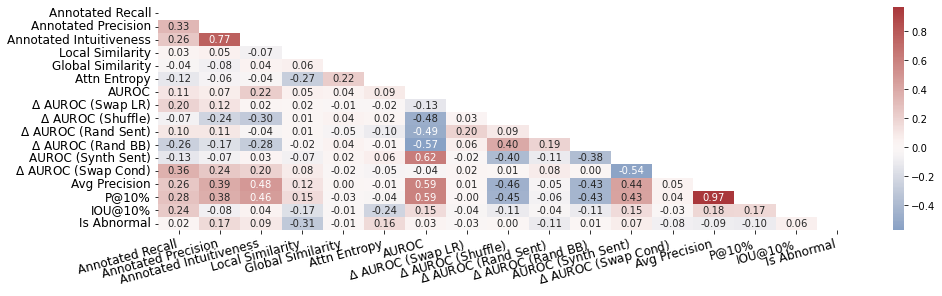

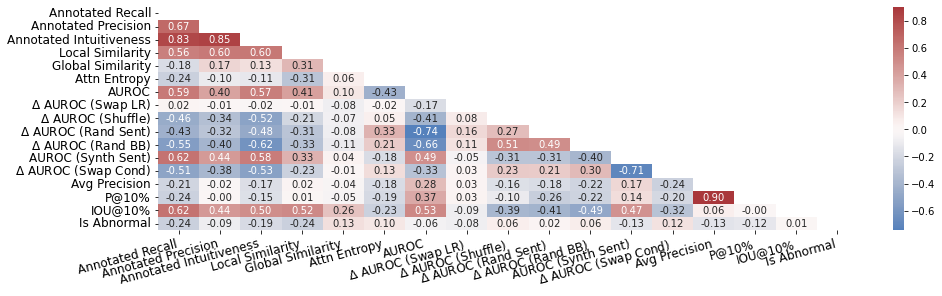

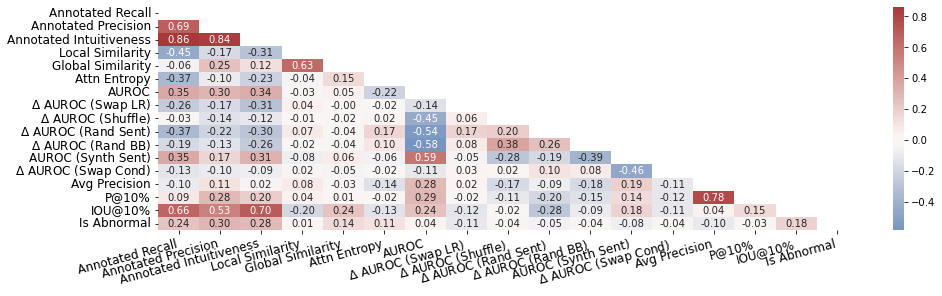

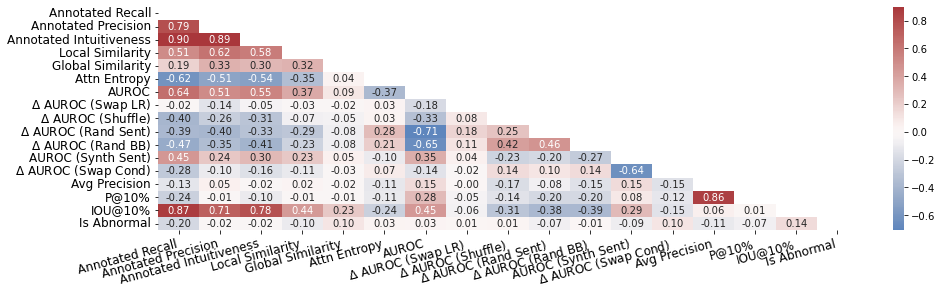

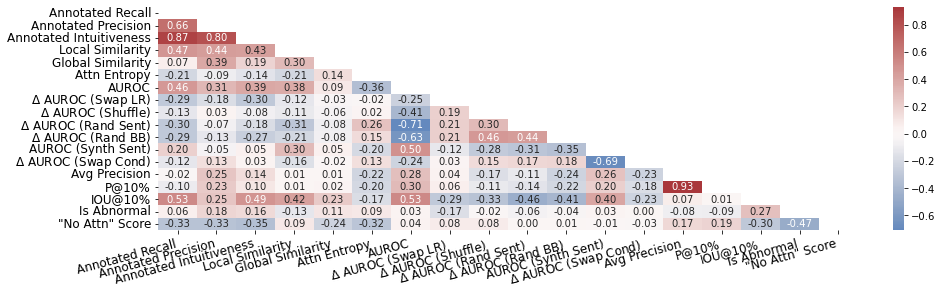

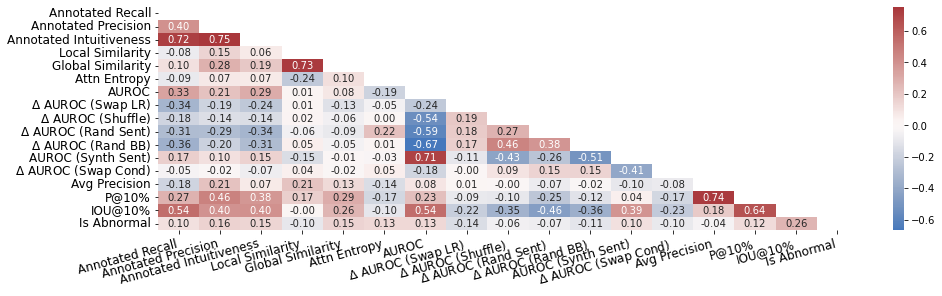

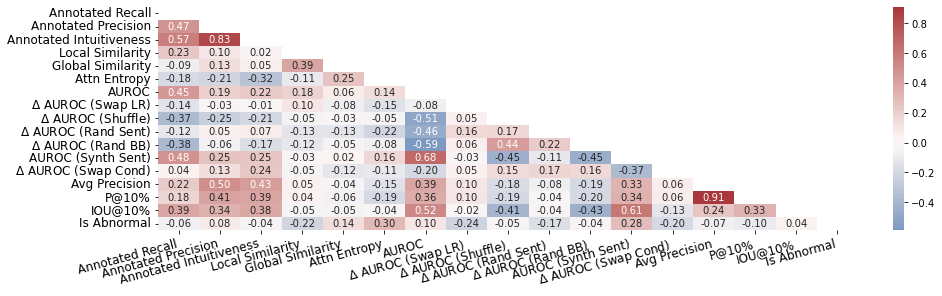

In [21]:
for i, row in correlation_df.iterrows():
    correlation_heatmap = {}
    for metric2 in metrics:
        if metric2 == 'no_attn_score' and row.model != 'retrainednoattn':
            continue
        correlation_heatmap[metric_names[metric2]] = {}
        for metric1 in metrics:
            if (metric1 + '_and_' + metric2) in row.keys():
                correlation_heatmap[metric_names[metric2]][metric_names[metric1]] = row[(metric1 + '_and_' + metric2)]
            elif metric1==metric2:
                correlation_heatmap[metric_names[metric2]][metric_names[metric1]] = float('nan')
    correlation_heatmap = pd.DataFrame(correlation_heatmap).transpose()
    plt.figure(constrained_layout = True, figsize=(13,4))
    chart = sns.heatmap(correlation_heatmap, center=0, annot=True, fmt='.2f', cmap='vlag')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=15, horizontalalignment='right', fontsize=12)
    chart.set_yticklabels(chart.get_yticklabels(), fontsize=12)
    plt.savefig('correlations_for_' + row.model + '_app.pdf')

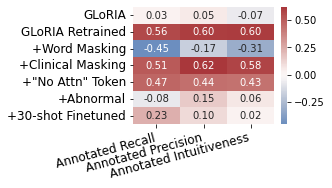

In [22]:
model_names = {'original': 'GLoRIA', 'retrained': 'GLoRIA Retrained',
                   'retrainedwordmasked': '+Word Masking',
                   'retrainedclinicalmasked': '+Clinical Masking',
                   'retrainednoattn': '+"No Attn" Token',
                   'retrainedabnormal': '+Abnormal',
                   'retrainedsup': '+30-shot Finetuned',
                   'retrainedrandsent': '+Rand Sents',
                   'uniter': 'UNITER'}
correlation_heatmap = {}
for i, row in correlation_df.iterrows():
    for metric2 in ['local_sim']:
        if metric2 == 'no_attn_score' and row.model != 'retrainednoattn':
            continue
        correlation_heatmap[model_names[row.model]] = {}
        for metric1 in ['ann_recall', 'ann_precision', 'ann_intuitiveness']:
            if (metric1 + '_and_' + metric2) in row.keys():
                correlation_heatmap[model_names[row.model]][metric_names[metric1]] = row[(metric1 + '_and_' + metric2)]
            elif metric1==metric2:
                correlation_heatmap[model_names[row.model]][metric_names[metric1]] = float('nan')
correlation_heatmap = pd.DataFrame(correlation_heatmap).transpose()
plt.figure(constrained_layout = True, figsize=(4.5,2.5))
chart = sns.heatmap(correlation_heatmap, center=0, annot=True, fmt='.2f', cmap='vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation=15, horizontalalignment='right', fontsize=12)
chart.set_yticklabels(chart.get_yticklabels(), fontsize=12)
plt.savefig('correlations_with_local_sim_app.pdf')


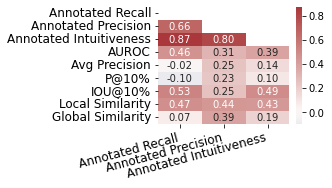

In [23]:
for i, row in correlation_df[correlation_df.model=='retrainednoattn'].iterrows():
    correlation_heatmap = {}
    for metric2 in metrics[:3] + metrics[6:7] + metrics[13:16] + metrics[3:5]:
        if metric2 == 'no_attn_score' and row.model != 'retrainednoattn':
            continue
        correlation_heatmap[metric_names[metric2]] = {}
        for metric1 in metrics[:3]:
            if (metric1 + '_and_' + metric2) in row.keys():
                correlation_heatmap[metric_names[metric2]][metric_names[metric1]] = row[(metric1 + '_and_' + metric2)]
            elif metric1==metric2:
                correlation_heatmap[metric_names[metric2]][metric_names[metric1]] = float('nan')
    correlation_heatmap = pd.DataFrame(correlation_heatmap).transpose()
    plt.figure(constrained_layout = True, figsize=(4.5,2.5))
    chart = sns.heatmap(correlation_heatmap, annot=True, fmt='.2f', center=0, cmap='vlag')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=15, horizontalalignment='right', fontsize=12)
    chart.set_yticklabels(chart.get_yticklabels(), fontsize=12)
plt.savefig('metric_corrs_for_' + row.model + '.pdf')

In [106]:
df = pd.read_csv('/scratch/mcinerney.de/uniter_data/imagenome/normal_output_test/sentences.csv')
df

,dicom_sent_id,patient_id,study_id,dicom_id,sent_id,sentence,bbox_names,sent_labels,sent_contexts,bboxes,...,f1_at_0.100000,iou_at_0.100000,precision_at_0.200000,recall_at_0.200000,f1_at_0.200000,iou_at_0.200000,precision_at_0.300000,recall_at_0.300000,f1_at_0.300000,iou_at_0.300000
0,dicom_5f721863-610a9bee-d359ae3e-773e15d7-4f6b...,11959746,52209033,5f721863-610a9bee-d359ae3e-773e15d7-4f6b5b38,52209033|0,WET READ: ___ ___ ___ 12:55 PM Mild interstit...,"['cardiac silhouette', 'left costophrenic angl...","['fluid overload/heart failure', 'fluid overlo...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']","[[85, 134, 193, 204], [200, 192, 222, 214], [1...",...,0.400042,0.000000,1.000000,0.382652,0.553504,0.250033,0.918106,0.505145,0.651714,0.398012
1,dicom_44dfb924-aa531eca-de68dd22-8cb16e27-1f9c...,16919147,58900743,44dfb924-aa531eca-de68dd22-8cb16e27-1f9c03a7,58900743|6,there are no consolidations or pleural effusi...,"['left costophrenic angle', 'left costophrenic...","['consolidation', 'pleural effusion', 'consoli...","['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']","[[171, 120, 193, 142], [171, 120, 193, 142], [...",...,0.624936,0.183766,0.816958,0.566260,0.668891,0.494484,0.884284,0.969535,0.924949,0.502506
2,dicom_657880ba-bba0d3f5-fa74a240-4d289446-5691...,15729731,54035665,657880ba-bba0d3f5-fa74a240-4d289446-56913a87,54035665|7,The lungs appear clear.,"['left lung', 'left lung', 'right lung', 'righ...","['lung opacity', 'normal', 'lung opacity', 'no...","['no', 'yes', 'no', 'yes']","[[128, 24, 222, 173], [128, 24, 222, 173], [27...",...,0.540633,0.082048,0.903030,0.385805,0.540633,0.082048,0.777502,0.476620,0.590968,0.391606
3,dicom_43d15ded-1802b1ca-9f6ec300-3920a884-6ffe...,11246165,52372684,43d15ded-1802b1ca-9f6ec300-3920a884-6ffedcd7,52372684|8,Atherosclerotic calcifications noted at the ao...,"['aortic arch', 'aortic arch', 'mediastinum', ...","['abnormal', 'vascular calcification', 'abnorm...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes']","[[124, 64, 139, 80], [124, 64, 139, 80], [100,...",...,0.104891,0.023508,0.458884,0.626085,0.529601,0.061453,0.480717,0.775613,0.593555,0.400688
4,dicom_770e644c-00f3ebc7-0f15fa96-b27ad599-ec48...,17911840,50590324,770e644c-00f3ebc7-0f15fa96-b27ad599-ec48eab8,50590324|9,imaged osseous structures are intact,"['left clavicle', 'right clavicle']","['normal', 'normal']","['yes', 'yes']","[[125, 39, 223, 75], [15, 14, 98, 77]]",...,0.368262,0.225476,0.755419,0.867574,0.807621,0.225687,0.389354,0.869123,0.537787,0.677319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,dicom_1e3a51e1-19d146d5-ea05a42a-ec7a34d7-f251...,17647207,56980410,1e3a51e1-19d146d5-ea05a42a-ec7a34d7-f251c88d,56980410|9,There is stable minimal left basilar linear at...,"['left lower lung zone', 'left lower lung zone...","['abnormal', 'atelectasis', 'linear/patchy ate...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...","[[133, 123, 216, 169], [133, 123, 216, 169], [...",...,0.326452,0.086195,0.551473,0.231849,0.326452,0.086195,0.703488,0.451108,0.549714,0.316987
2503,dicom_7970d40b-63cd4bca-0e9d32e9-33b0c4cb-fab1...,17005222,56937906,7970d40b-63cd4bca-0e9d32e9-33b0c4cb-fab1f7a7,56937906|9,IMPRESSION: Mild cardiomegaly.,['cardiac silhouette'],['enlarged cardiac silhouette'],['yes'],"[[83, 101, 193, 169]]",...,0.867008,0.000000,0.585385,0.962267,0.727937,0.758855,0.472992,0.990077,0.640159,0.572249
2504,dicom_8002f7f5-0afbc292-4c0d7cd6-2d367e09-3cab...,16403314,52040222,8002f7f5-0afbc292-4c0d7cd6-2d367e09-3cab5800,52040222|8,Minimal opacification at the lung bases is con...,"['left lower lung zone', 'left lower lung zone...","['abnormal', 'atelectasis', 'lung opacity', 'a...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...","[[133, 123, 204, 167], [133, 123, 204, 167], [...",...,0.358689,0.141550,0.949222,0.543771,0.691442,0.417031,0.924289,0.935205,0.929715,0.570599
2505,dicom_32d1c115-79e9dd72-347daf9c-653794f4-3f9b...,18969313,50769434,32d1c115-79e9dd72-347da

In [7]:
import numpy as np
import pandas as pd

In [22]:
attn = np.load('/scratch/mcinerney.de/uniter_data/imagenome/normal_output_test/attn/dicom_3f1b172a-525b15c6-6bc1b652-f28ecbc2-49a21d7d_sent_55972160|10.npy')
image = np.load('/scratch/mcinerney.de/uniter_data/imagenome/normal_output_test/image/dicom_3f1b172a-525b15c6-6bc1b652-f28ecbc2-49a21d7d_sent_55972160|10.npy')
sentences = pd.read_csv('/scratch/mcinerney.de/uniter_data/imagenome/normal_output_test/sentences.csv')
sentrow = sentences[sentences.dicom_sent_id == 'dicom_3f1b172a-525b15c6-6bc1b652-f28ecbc2-49a21d7d_sent_55972160|10'].iloc[0]
attn_bboxes = sentrow.attn_bboxes

In [31]:
import torch
def attn_overlay_func(image_shape, attention, bboxes):
    attention_overlay = []
    for attn, (x1, y1, x2, y2) in zip(attention, bboxes):
        attn_overlay = np.zeros((1, *image_shape))
        attn_overlay[:, x1:x2, y1:y2] = attn
        attention_overlay.append(attn_overlay)
    attention_overlay = np.concatenate(attention_overlay, axis=0)
    attention_overlay = attention_overlay.max(axis=0)
    return torch.tensor(attention_overlay)

<ipython-input-82-ba970c2caec1>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attn_rgb_image = to_rgb(torch.tensor(attnimg))


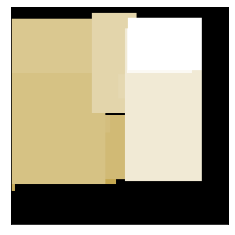

In [82]:
from gloria.datasets.visualization_utils import *
import cv2
attnimg = attn_overlay_func(image.shape, attn, eval(attn_bboxes))
attn_rgb_image = to_rgb(torch.tensor(attnimg))
attn_rgb_image = cv2.normalize(attn_rgb_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
attn_rgb_image = cv2.applyColorMap(attn_rgb_image, cv2.COLORMAP_OCEAN)
plt.imshow(torch.tensor(attn_rgb_image).permute(1, 0, 2))

#get current axes
ax = plt.gca()

#hide x-axis
ax.get_xaxis().set_visible(False)

#hide y-axis 
ax.get_yaxis().set_visible(False)
plt.savefig('uniter_attn.png')

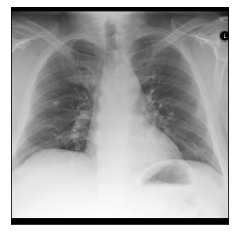

In [81]:
plt.imshow(to_rgb(torch.tensor(image)))
#get current axes
ax = plt.gca()

#hide x-axis
ax.get_xaxis().set_visible(False)

#hide y-axis 
ax.get_yaxis().set_visible(False)
plt.savefig('uniter_attn_img.png')

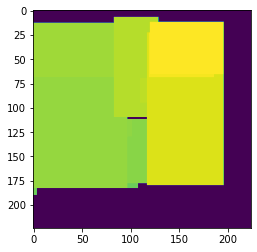

In [40]:
import matplotlib.pyplot as plt
plt.imshow(attnimg.T)

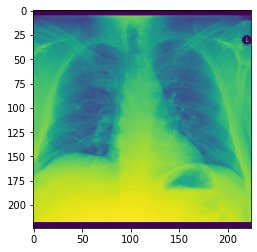

In [39]:


plt.imshow(image)